In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.integrate as integrate

**Le but est d’étudier deux approches Monte-Carlo pour donner une approximation de la quantité :**

$$
I = \int_0^1 \cos(x^3) e^{-x/2} \, dx.
$$

1. On va montrer que $I$ peut être écrit sous les formes suivantes :

$$
I = \mathbb{E} \left[ \cos(U^3)e^{-U/2} \right], \quad I = \mathbb{E} \left[ 2 \cos(X^3) \cdot \mathbb{1}_{X \in (0,1)} \right],
$$

où $U$ est une variable aléatoire de loi uniforme sur $(0,1)$ et $X$ est une variable aléatoire de loi exponentielle de paramètre $1/2$.

Comme la loi de $U$ a pour densité la fonction $x \mapsto \mathbb{1}_{[0,1]}(x)$, on a directement que :

$$
\mathbb{E} \left[ \cos(U^3)e^{-U/2} \right] = \int_0^1 \cos(x^3)e^{-x/2} \, dx,
$$

ce qui est précisément le résultat attendu.

Pour la seconde expression, comme la loi de $X$ a pour densité la fonction $x \mapsto \frac{1}{2} \mathbb{1}_{x > 0}e^{-x/2}$, on a que :

$$
\mathbb{E} \left[ 2 \cos(X^3) \cdot \mathbb{1}_{(0,1)}(X) \right] = \int_0^\infty \cos(x^3) \mathbb{1}_{(0,1)}(x)e^{-x/2} \, dx = \int_0^1 \cos(x^3)e^{-x/2} \, dx,
$$

qui est aussi le résultat attendu.



In [5]:
def f_MC(x):
    return(np.cos(x**3)*np.exp(-x/2))

#calcul d'une valeur approchee de l integrale par une methode deterministe predefinie
I=integrate.quad(f_MC, 0,1)
print(I[0])

#calcul d'une valeur approchee de l integrale par une premiere methode MC

def MC_1(n):
    tirages=f_MC(st.uniform.rvs(size=n))
    approximation=np.mean(tirages)
    return(approximation)

n=int(10**4)
print(MC_1(n))


def MC_2(n):
    expo=st.expon.rvs(size=n,scale=2)
    tirages=2*np.cos(expo**3)*(expo<1)   #.astype(int)
    approximation=np.mean(tirages)
    return(approximation)

n=int(10**4)
print(MC_2(n))

0.7427199902770081
0.7419783657277655
0.7510966427588586


Text(0, 0.5, 'Approximation de I')

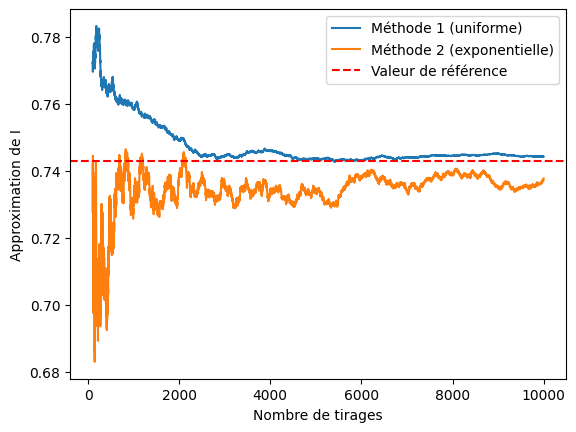

In [6]:
n = 10**4
plage=range(1,n+1)

def MC_1b(n):
    tirages=f_MC(st.uniform.rvs(size=n))
    approximation=np.cumsum(tirages)/np.arange(1,n+1)
    return(approximation)

def MC_2b(n):
    expo=st.expon.rvs(size=n,scale=2)
    tirages=2*np.cos(expo**3)*(expo<1).astype(int)
    approximation=np.cumsum(tirages)/np.arange(1,n+1)
    return(approximation)

ValeursMC1 = MC_1b(n)
ValeursMC2 = MC_2b(n)

Val_initiale=100
plt.plot(plage[Val_initiale:], ValeursMC1[Val_initiale:], label='Méthode 1 (uniforme)')
plt.plot(plage[Val_initiale:], ValeursMC2[Val_initiale:], label='Méthode 2 (exponentielle)')

I=integrate.quad(f_MC, 0,1)	#Valeur de reference
plt.axhline(I[0], xmin=0, xmax=n, color='red', linestyle='--', label='Valeur de référence')
plt.legend()
plt.xlabel('Nombre de tirages')
plt.ylabel('Approximation de I')

Graphiquement la méthode 1 semble converger plus rapidement que la méthode 2.

**Aiguilles de Buffon.** 
Sur un parquet constitué de lattes de largeur 1 unité et de longueur 10 unités, on lance des aiguilles ayant elles-mêmes 1 unité pour largeur. On compte alors la proportion d’aiguilles touchant les bords d’une latte. On se restreint à 10 lattes. On oriente le repère de manière à ce que les lattes soient orientées verticalement avec les bords aux abscisses entières. On appelle $(X_1, X_2)$ le vecteur aléatoire modélisant le centre de l’aiguille et $\theta$ l’angle que fait l’aiguille avec l’axe des ordonnées. On suppose que les variables $X_1$ et $X_2$ sont indépendantes et de loi uniforme $\mathcal{U}([0;10])$, et que la variable $\theta$ est indépendante de $(X_1, X_2)$ et de loi uniforme $\mathcal{U}([0; \pi])$.



**On va montrer que la probabilité qu’une aiguille touche le bord d’une latte est $2/\pi$.**

L’aiguille touche le bord d’une latte si les deux extrémités de l’aiguille ne sont pas sur la même latte, c’est-à-dire s'il existe un bord de latte, numéroté $k \in \{0, \dots, 10\}$ tel que l’abscisse de l’extrémité la plus à gauche soit inférieure à $k$ et l’abscisse de l’extrémité la plus à droite soit supérieure à $k$. En notant $A$ l’événement d’intérêt, on a donc :

$$
A := \left\{ \exists k \in \{0, \dots, 10\}, \quad X_1 - \frac{1}{2} \sin \theta < k \leq X_1 + \frac{1}{2} \sin \theta \right\}
$$

$$
= \bigcup_{k=0}^{10} \left\{ -\frac{1}{2} \sin \theta < k - X_1 \leq \frac{1}{2} \sin \theta \right\}.
$$

Les ensembles ci-dessus sont deux à deux disjoints. On a donc :

$$
\mathbb{P}(A) = \sum_{k=0}^{10} \mathbb{P} \left( -\frac{1}{2} \sin \theta < k - X_1 \leq \frac{1}{2} \sin \theta \right)
$$

$$
= \sum_{k=0}^{10} \frac{1}{\pi} \int_{0}^{\pi} \int_{0}^{10} \mathbf{1}_{-\frac{1}{2} \sin t < k - x \leq \frac{1}{2} \sin t} \, dx \, dt.
$$

De fait, pour $k \in \{1, \dots, 9\}$, l’intégrale $\int_{0}^{10} \mathbf{1}_{-\frac{1}{2} \sin t < k - x \leq \frac{1}{2} \sin t} \, dx$ vaut $\sin t$, et pour $k = 0$ ou $k = 10$, cette intégrale vaut $\frac{1}{2} \sin t$. Ainsi, la probabilité recherchée est :

$$
\mathbb{P}(A) = \frac{1}{\pi} \int_{0}^{\pi} \sin t dt = \frac{2}{\pi}.
$$

Ce qui montre que la probabilité qu'une aiguille touche le bord d’une latte est bien $2/\pi$.


3.1313605761703456


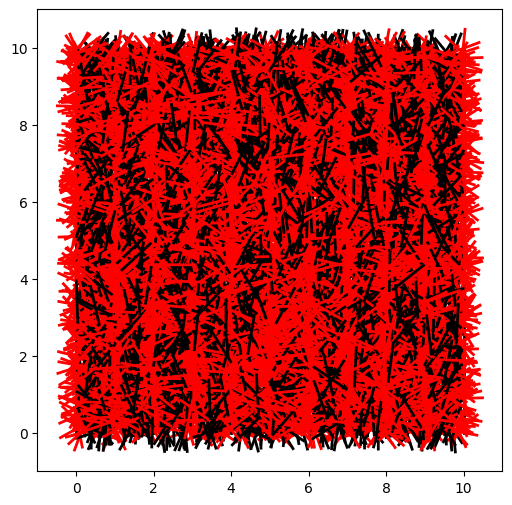

In [7]:
plt.figure(figsize=(6,6))
plt.xlim(-1, 11)
plt.ylim(-1, 11)

# Tracé des 11 segments verticaux (les lattes)
for i in range(11):
    plt.plot([i, i], [0, 10], 'k', linewidth=2)


# Fonction pour lancer une aiguille
def aiguille():
    centre = st.uniform.rvs(size=2,loc=0,scale=10)
    angle = st.uniform.rvs(size=1,loc=0,scale=np.pi)
    angle=angle[0]
    extremite_1 = centre + 0.5 * np.array([np.sin(angle), np.cos(angle)])
    extremite_2 = centre - 0.5 * np.array([np.sin(angle), np.cos(angle)])
    color = "black"
    res = int(np.floor(extremite_1[0]) != np.floor(extremite_2[0]))
    if res == 1:
        color = "red"
    plt.plot([extremite_1[0], extremite_2[0]], [extremite_1[1], extremite_2[1]], color, linewidth=2)
    return res


# Lancer de n aiguilles
n=int(10**4)
res=np.zeros(n)
for i in range(n):
    res[i]=aiguille()


# Estimation de la valeur de Pi
estimated_pi = 2 / np.mean(res)
print(estimated_pi)